Data Pre-processing

In [ ]:
#Installing package to process emojis
!pip install emoji

     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=ce64b3b3bf8bcd086e02bf094744325236de80190fc49a4cd9804efccd911cf1
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
#Installing package to process multiple text mining tasks including sentiment analysis
!pip install TextBlob

In [ ]:
#Import libraries
import json
import pandas as pd  
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import datetime
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Increasing column width for readability of messages
pd.options.display.max_colwidth = 1000

In [ ]:
#Import telegram channels data lying in json format
df_crypto_vigil = pd.read_json('result_crypto_vigil.json')
df_defi = pd.read_json('result_defi.json')
df_dao = pd.read_json('result_dao.json')
df_lobs = pd.read_json('result_lobs.json')
df_crypto_brief = pd.read_json('result_crypto_brief.json')
df_crypto_wolf = pd.read_json('result_crypto_wolf.json')
df_crypto_differ = pd.read_json('result_crypto_differ.json')
df_crypto_daku = pd.read_json('result_crypto_daku.json')

In [ ]:
#Merging all the channels data
df = pd.concat([df_crypto_vigil,df_defi,df_dao,df_lobs,df_crypto_brief,df_crypto_wolf,df_crypto_differ,df_crypto_daku], ignore_index=True)


In [ ]:
#Subsetting required columns
df1 = pd.json_normalize(df['messages']) 
df3 = df1[['id','date','from','text']]
df3.shape

(596767, 4)

In [ ]:
#Extracting decentralized related messages
#df3 = df2[df2['text'].str.contains("decentralization")|df2['text'].str.contains("decentralize")|df2['text'].str.contains("decentralized")]

In [ ]:
#Creating date variables for filtering data for analysis
df3['date'] = pd.to_datetime(df3['date'], errors='coerce')
df3['mnth_yr'] = df3['date'].apply(lambda x: x.strftime('%B-%Y')) 
df3['month'] = df3['date'].dt.month
df3['quarter'] = df3['date'].dt.quarter
df3['year'] = df3['date'].dt.year
df3["period"] = df3["year"].astype(str) + '-' + df3["quarter"].astype(str)

In [ ]:
#Message frequency by senders
count_sender = df3['from'].value_counts()
count_sender.to_csv("sender.csv")
count_sender.head()

ivangbi 👾                                                                                                              27500
Short Shark                                                                                                            17559
@CryptoVigilante                                                                                                       13828
☣️ᙢΘℝ฿𝕚ĐỬᏕ☣️ | CMC ne'er do well | Scio Me Nihil Scire | Longname Enthusiast | TG Revolutionary | FUD Televangelist    11491
Reaper .                                                                                                                9942
Name: from, dtype: int64

In [ ]:
#Message frequency by month and year
mnth_yr = df3['mnth_yr'].value_counts()
mnth_yr.to_csv("mnth_yr.csv")
mnth_yr.head()

August-2020       69871
September-2020    66033
October-2020      48970
July-2020         48196
March-2020        34790
Name: mnth_yr, dtype: int64

In [ ]:
#Message frequency by year
year = df3['year'].value_counts()
year.to_csv("year.csv")
year.head()

2020    415734
2019    145696
2018     34008
2017      1329
Name: year, dtype: int64

In [ ]:
#Message frequency by year an quarter
period = df3['period'].value_counts()
period.to_csv("period.csv")
period.head()

2020-3    184100
2020-1     92682
2020-2     89982
2019-4     58582
2019-3     51361
Name: period, dtype: int64

In [ ]:
#Reading some random messages
for index,text in enumerate(df3['text'][35:40]):
  print('Message %d:\n'%(index+1),text)

Message 1:
 BTT dropped so hard
Message 2:
 Yo
Message 3:
 As it should..
Message 4:
 We sending scum to jail here or discussing price action? 🤪
Message 5:
 Both


Data Cleaning

In [ ]:
#Removing URLs
import re
df3['cleaned']=df3['text'].astype(str).apply(lambda x: re.sub(r'http\S+', '', x))
df3.head()

,id,date,from,text,mnth_yr,month,quarter,year,period,cleaned
0,1,2019-04-04 07:32:16,NaN,,April-2019,4,2,2019,2019-2,
1,2,2019-04-04 07:34:42,NaN,,April-2019,4,2,2019,2019-2,
2,4,2019-04-05 08:50:34,@CryptoVigilante,"[🕵 Welcome to the Crypto Vigilante Network chat.\n\n🏴 Here you can discuss crypto analysis, educational articles, scams, and shillers.\n\n✴ Follow the main channel , {'type': 'mention', 'text': '@CryptoVigilante'}, \n\n, {'type': 'link', 'text': 'https://medium.com/@CryptoVigilanteNetwork'}, ]",April-2019,4,2,2019,2019-2,"['🕵 Welcome to the Crypto Vigilante Network chat.\n\n🏴 Here you can discuss crypto analysis, educational articles, scams, and shillers.\n\n✴ Follow the main channel ', {'type': 'mention', 'text': '@CryptoVigilante'}, '\n\n', {'type': 'link', 'text': ' '']"
3,5,2019-04-05 08:57:12,NaN,,April-2019,4,2,2019,2019-2,
4,6,2019-04-05 08:59:49,NaN,,April-2019,4,2,2019,2019-2,


In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","aren't": "are not","let’s":"let us",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
# Regular expression for finding contractions
import re
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
contractions_re

re.compile(r"(ain't|aren't|let’s|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [ ]:
# Expanding Contractions in the messages
df3['cleaned']=df3['cleaned'].astype(str).apply(lambda x:expand_contractions(x))

In [ ]:
#check the applied contractions
#test = df3[df3['id']==63]

In [ ]:
#Converting text to all lower caps
df3['cleaned']=df3['cleaned'].apply(lambda x: x.lower())

In [ ]:
# #Translate to english 
# from time import sleep
# from textblob import TextBlob
# from textblob.exceptions import NotTranslated    

# def translate_comment(x):
#     try:
#         # Try to translate the string version of the comment
#         return TextBlob(str(x)).translate(to='en')
#     except NotTranslated:
#         # If the output is the same as the input just return the TextBlob version of the input
#         return TextBlob(str(x))

# for i in range(len(df3['cleaned'])):
#     # Translate one comment at a time
#     df3['cleaned'].iloc[i] = translate_comment(df3['cleaned'].iloc[i])

#     # Sleep for a quarter of second
#     sleep(0.25)

In [ ]:
#Removing digits and word containing digits
df3['cleaned']=df3['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
#Removing punctuations
df3['cleaned']=df3['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df3.replace("'",'', regex=True)

,id,date,from,text,mnth_yr,month,quarter,year,period,cleaned
0,1,2019-04-04 07:32:16,NaN,,April-2019,4,2,2019,2019-2,
1,2,2019-04-04 07:34:42,NaN,,April-2019,4,2,2019,2019-2,
2,4,2019-04-05 08:50:34,@CryptoVigilante,"[🕵 Welcome to the Crypto Vigilante Network chat.\n\n🏴 Here you can discuss crypto analysis, educational articles, scams, and shillers.\n\n✴ Follow the main channel , {'type': 'mention', 'text': '@CryptoVigilante'}, \n\n, {'type': 'link', 'text': 'https://medium.com/@CryptoVigilanteNetwork'}, ]",April-2019,4,2,2019,2019-2,🕵 welcome to the crypto vigilante network chatnn🏴 here you can discuss crypto analysis educational articles scams and shillersnn✴ follow the main channel type mention text cryptovigilante nn type link text
3,5,2019-04-05 08:57:12,NaN,,April-2019,4,2,2019,2019-2,
4,6,2019-04-05 08:59:49,NaN,,April-2019,4,2,2019,2019-2,
...,...,...,...,...,...,...,...,...,...,...
596762,4955,2020-10-29 04:01:54,Crypto Daku,"[{'type': 'link', 'text': 'https://twitter.com/CoinDesk/status/1321531639940481024?s=19'}]",October-2020,10,4,2020,2020-4,type link text
596763,4956,2020-10-29 11:04:26,Crypto Daku,"[{'type': 'bold', 'text': 'Binance Will List Bounce (BOT) in the Innovation Zone '}, \n, {'type': 'link', 'text': 'https://www.binance.com/en/support/announcement/19e84ae4ae924272b75f67702e06fa5e'}]",October-2020,10,4,2020,2020-4,type bold text binance will list bounce bot in the innovation zonen n type link text
596764,4957,2020-10-29 11:27:05,Crypto Daku,"[{'type': 'link', 'text': 'https://near.org/blog/balancers-defi-protocol-is-bringing-programmable-liquidity-to-near/'}]",October-2020,10,4,2020,2020-4,type link text
596765,4958,2020-10-29 12:25:41,Crypto Daku,"[{'type': 'link', 'text': 'https://cointelegraph.com/news/indian-bank-to-offer-crypto-services-across-its-34-branches'}]",October-2020,10,4,2020,2020-4,type link text


In [ ]:
# Removing extra spaces
df3['cleaned']=df3['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
#Lemmatizing with additional stop words
# Importing spacy
import spacy
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
nlp.Defaults.stop_words |= {"aa","aaa","aaaa","aaaaa","aaaaaa","aaaaaaa","aaaaaaaa","aaaaaaaaaa","aaaaaaaaaaa","aaaaaaaaaaaa",
                            "aaaaaaaaaaaaa","aaaaaaaaaaaaaaa","aaaaaaaaaaaaaaaaaaaa","aaaaaaaaaaaaaaaaaaaaaaaaaa",
                            "aaaaaaaaahahahahah","aaaah","aaaand","aaaannps","aaaarrrrrin","aaahahahaahahàaaaahahaha","aaave",
                            "aaavegotchpocicho","aaawww","aabtc","aactually","aagent","aahaahahaahah","aahah","aahahahah","aahha",
                            "aahhaaahhahahahaha","aalso","aam","aand","aanswere","aapl","aapprentice","aare","aaron","aasset","...",
                            "эфир","эфирnn","января","ಠಠ","⅒x","ノnヽ","ヽn	三ヽ人", "假币在uniswap上","北風","发现一个crv","和或者",
                            "如果你们曾有过任何交流","并尽快告知我","沟通过的人","牛币","肏你妈","该代币的合约代码中有示例注释",
                            "该币发行者甚至没有移除这些明显的注释","请提供给我详细的记录","请立即停止你们的联系","谢谢","계약을","고객지원",
                            "공식","대행","블록체인","삼성","삼성전자와","서비스","서비스를","알려드립니다","업무","웁살라시큐리티는",
                            "월렛의","제휴","지원하기로","체결하여","협의하였음을","zzkkkkeeekkkkkk","zzz","zzzz","zzzzz","Ã¡ndale",
                            "Ã¡ngela","ссылка","ссылке","стрим","стрима","таймкоды","так","также","текущий","телеграм","токене",
                            "токенов","том","топы","трансляцию","тренды","тут","ты","удачи","удобства","условия","участия",
                            "участник","участников","фармится","фас","форму","хайп","чад","часов","чатик","человек","через","что",
                            "чтобы","штук","этапа","этапов","это","этого","этом","приватизация","приз","призов","проектам","проектов","пропустить",
                            "пропуститьnnваш","проснувшихся","простую","простыми","профитной","прям","прямо","прямой","разделим",
                            "разыграть","разыграют","расскажет","ретвитнуть","решила","решили","рынок","самую","сатоши","свежие",
                            "своей","сделали","сделки","сегодня","секретный","сердце","сети","сказал","следующем","слова",
                            "случайных","смотри","спасибо","спящих","среди","многое","множество","мск","мскnвот","мскnи","мы","на",
                            "нам","напомнить","нас","наступающем","насыщенный","наш","нашего","нашему","не","необходимо",
                            "несколько","новому","новости","новых","обновляющих","обсудили","обсудим","объявим","первом",
                            "переходите","перспективы","пиши","планы","по","победителей","поговорить","подписаться","показать",
                            "получит","после","пост","правиламиnn","при","желуди","жизнь","жми","жмите","за","закреплённом","заполнить",
                            "иван","ивана","из","индустрия","интересен","интересных","историю","как","какие","канал","карликов",
                            "киев","команда","коментах","комменте","комьюнити","конечно","конкурсом","которые","который","которым",
                            "крутую","куда","ли","лишь","лобстера","лои","лудилка","любом","маркетинговым","мне","мнению","много",
                            "zu","zug","адвайзером","айсберга","активности","аудиоверсию","аудиоподкаст","блокчейн","будет","бывшим","был","вашего",
                            "ведь","верхушка","взгляд","возможностей","все","всего","всем","встречеnnваш","выбились","выполнивших","где","гигантов",
                            "год","году","головко","гостях","график","далее","два","движется","декабря","для","добавили","другоеnnпоговорим","душу",
                            "есть","еще","же","type","text","link","mention","u","sir","lol","rekt","people","s","ye","know","ser","think","go",
                            "stuff","yes","ok","sell","thing","token","new","mean","actually","fuck","eth","pool","time","let",
                            "thank","yfi","try","guy","shill","say","get","aaaaaaaaaaaaaaaaa","aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa","aaaaaaaaaall",
                            "aaaaaaaall","aaaaaahno","aaaaah","aaaaand","aaaagh","aaaahhhhhhhh","aaah","aaand","aabaut","aadenine","aaeva","aaeve",
                            "aagent","aah","aahaha","aahh","aahhahaa","aai","aaint","aajoan","aalthough","aamze","aann","aannon","aanswere","aapldai",
                            "aapprentice","aaqnd","aart","aaryan","aasset","aasynchronous","aatoken","aava","aave","aaveaave","aavecado",
                            "투자자로서","투자자의","투자하기","투자하기에","투자한","파트너가","파트너이자","파트너인","하이요","해서","해시드","해시드와",
                            "현재가","혜안heaan","획득을","획득하는데","“","”","**<+\\’wbixos739>~+¥}","<•>","s","like","good","not","bold","work","token",
                            "project","bitcoin","centralization","decentralization","decentralize","decentralized","blockchain","defi","governance",
                            "regulation",
}
# Lemmatization with stopwords removal
df3['lemmatized']=df3['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Sentiment Analysis - VADER 

In [ ]:
#vader sentiment analyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#Removing emojis
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text
df3['lemmatized_wo_emoji']=df3['lemmatized'].astype(str).apply(lambda x:give_emoji_free_text(x))

In [ ]:
#Scoring polarity
df3['scores'] = df3['lemmatized_wo_emoji'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
#Extracting compund score
df3['compound']  = df3['scores'].apply(lambda score_dict: score_dict['compound'])

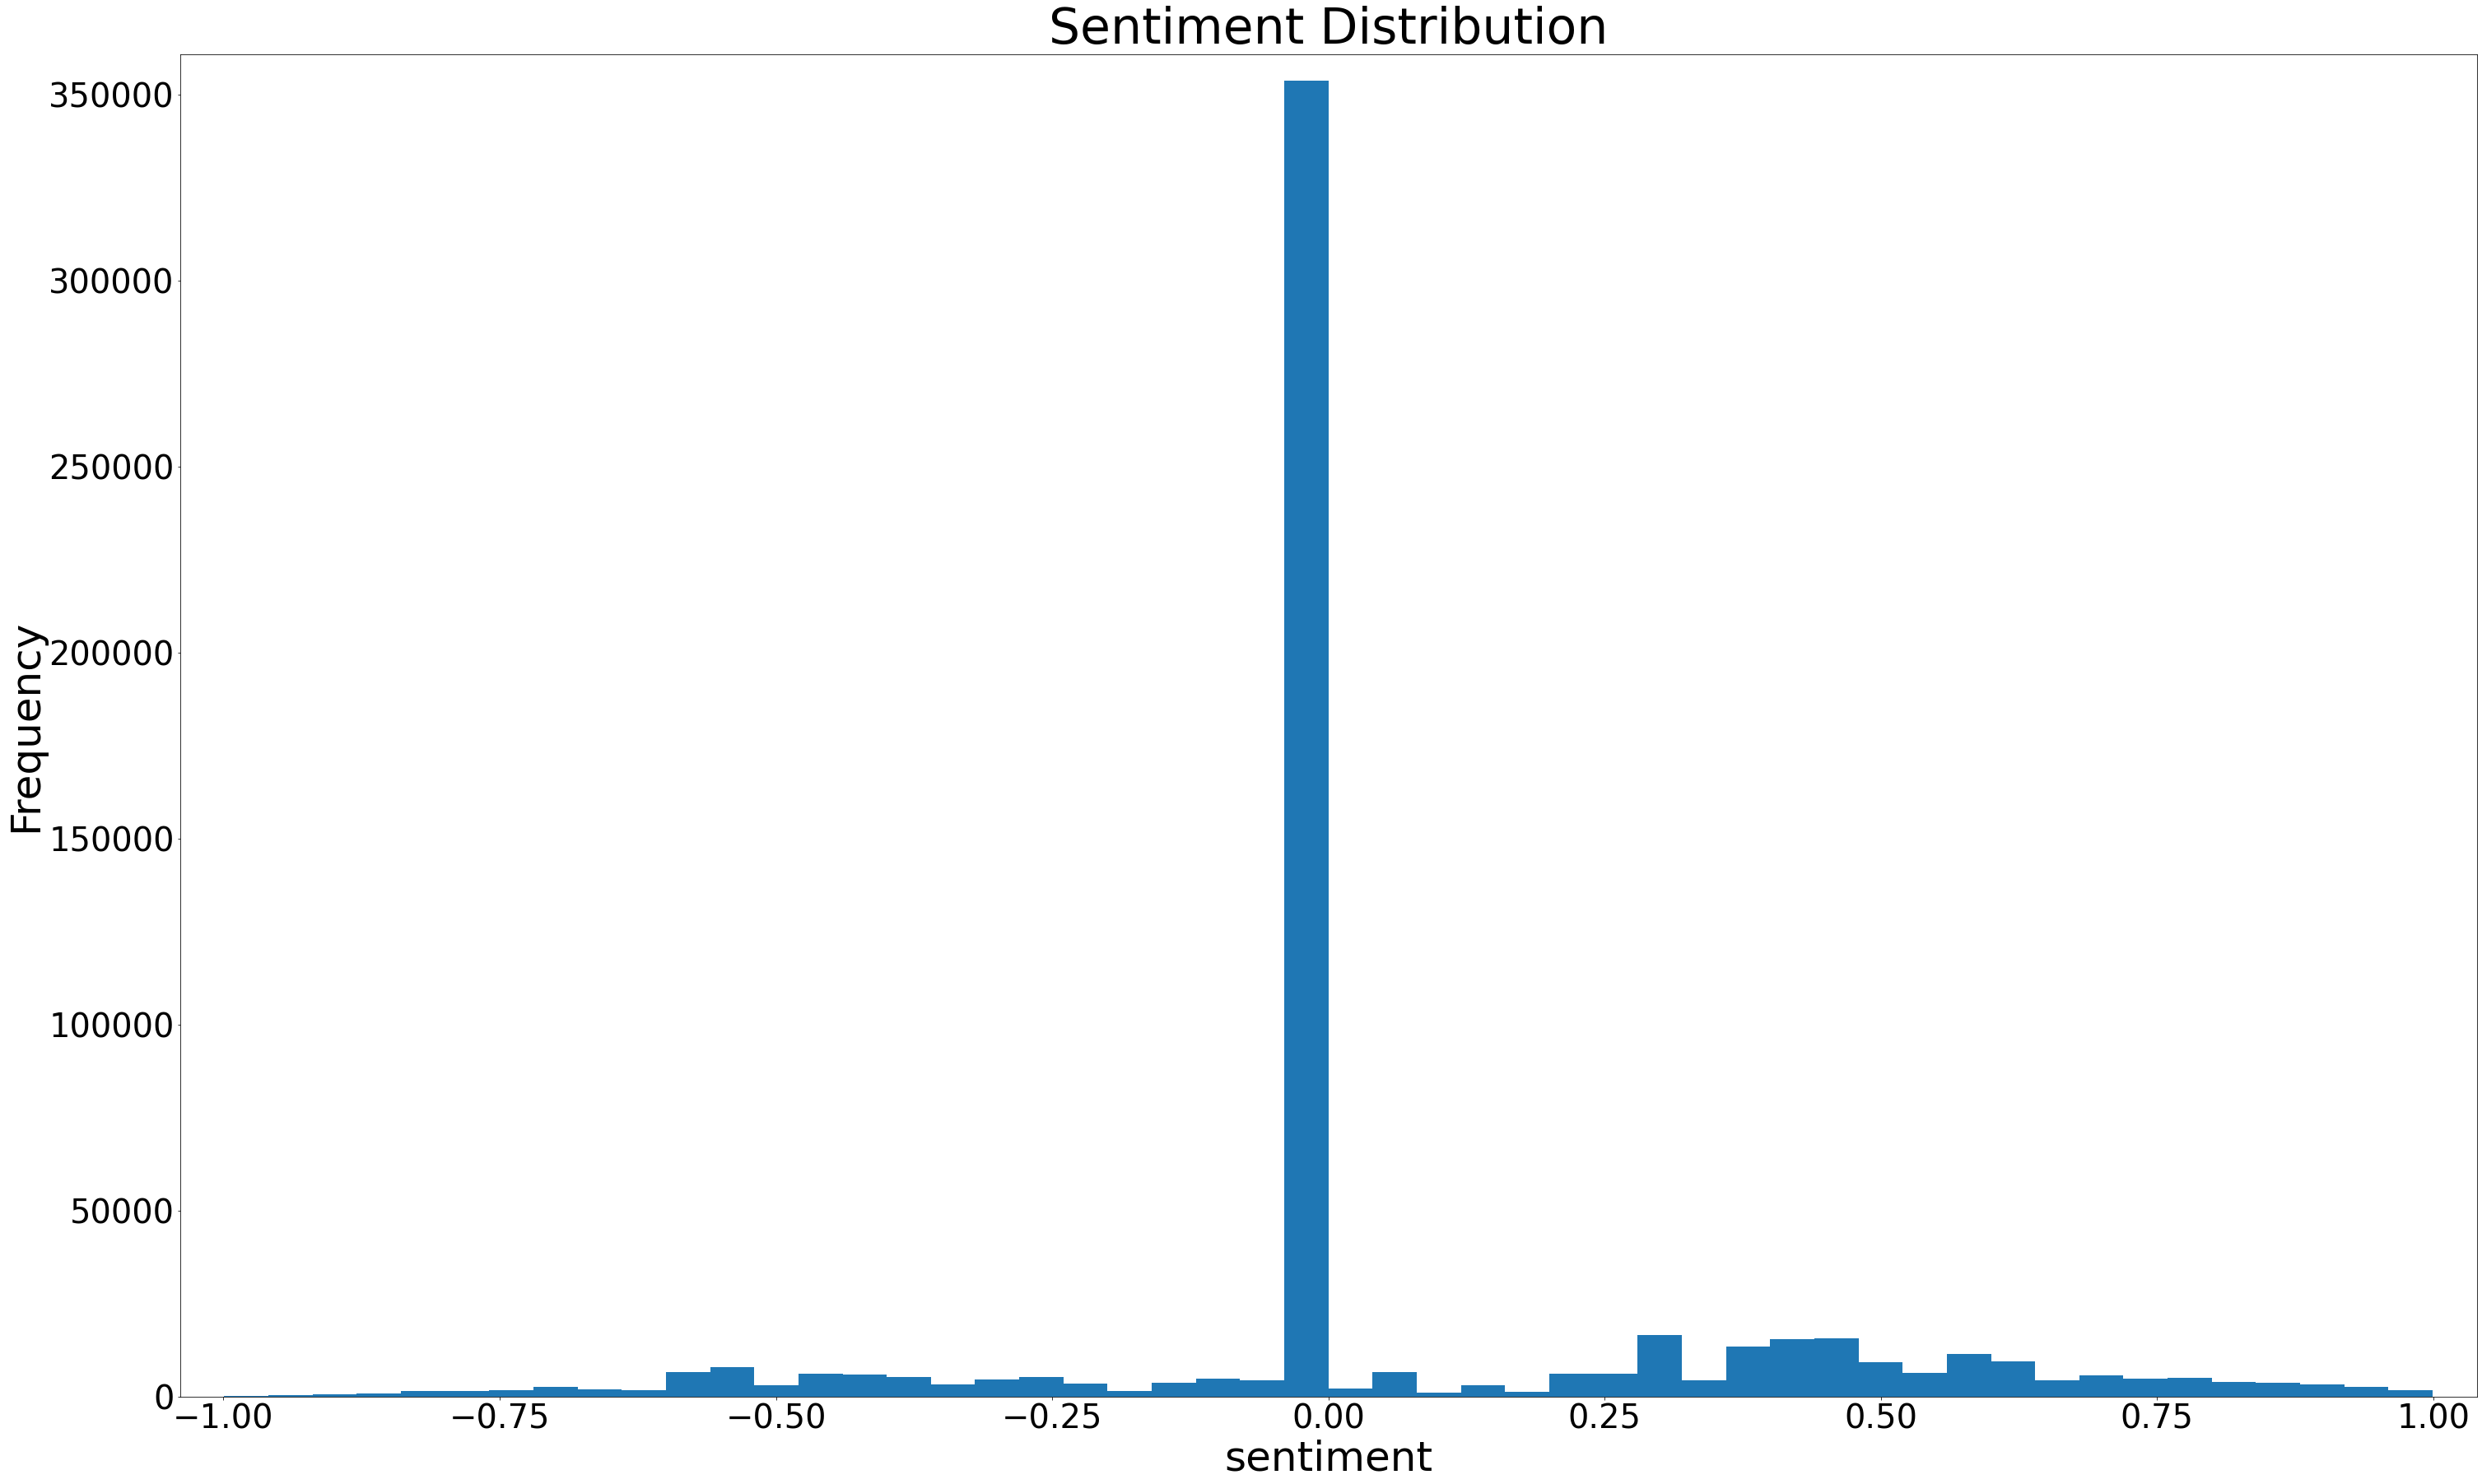

In [ ]:
#Plotting sentiment histogram
from matplotlib import pyplot as plt
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df3['compound'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [ ]:
#Checking random messages with highest polarity
print("3 Random Messages with Highest Polarity:")
for index,review in enumerate(df3.loc[df3['compound'].sort_values(ascending=False)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Messages with Highest Polarity:
Message 1:
 s as a network-level incentive to grow the Pi Network while also incentivizing engagement among members in actively securing the network.

D - Developer Reward Supply (Additional Pi minted to support ongoing development)
Pi will fund its ongoing development with a “Developer Reward” that is minted alongside each coin that is minted for mining and referrals. Traditionally, cryptocurrency protocols have minted a fixed amount of supply that is immediately placed into treasury. Because Pi’s total supply is dependent on the number of members in the network, Pi progressively mints its developer reward as the network scales. The progressive minting of Pi’s developer reward is meant to align the incentives of Pi’s contributors with the overall health of the network. 

f is a logarithmically decreasing function - early members earn more
While Pi seeks to avoid extreme concentrations of wealth, the network also seeks to reward earlier members 

In [ ]:
#Checking random messages with lowest polarity
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df3.loc[df3['compound'].sort_values(ascending=True)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Message 1:
 [{'type': 'bold', 'text': 'Top 20 Countries: Most COVID-19 Deaths\n\n'}, '1. USA - 230,510 deaths\n2. Brazil - 157,163 deaths\n3. India - 119,030 deaths\n4. Mexico - 88,743 deaths\n5. UK - 44,896 deaths\n6. Italy - 37,338 deaths\n7. France - 34,761 deaths\n8. Spain - 34,752 deaths\n9. Peru - 34,149 deaths\n10. Iran - 32,616 deaths\n11. Colombia - 30,154 deaths\n12. Argentina - 28,896 deaths\n13. Russia - 26,050 deaths\n14. South Africa - 18,968 deaths\n15. Chile - 13,944 deaths\n16. Indonesia - 13,299 deaths\n17. Ecuador - 12,553 deaths\n18. Belgium - 10,737 deaths\n19. Iraq - 10,623 deaths\n20. Germany - 10,138 deaths\n\n', {'type': 'bold', 'text': 'Top 20 Countries: COVID-19 Deaths per 1 Million'}, ' ', {'type': 'bold', 'text': 'People\n\n'}, '1. Peru - 1,031 deaths per million\n2. Belgium - 925 deaths per million\n3. Spain - 743 deaths per million\n4. Brazil - 738 deaths per million\n5. Bolivia - 736 deaths per million\n6. Chile - 7

Sentiment Analysis - TEXTBLOB

In [ ]:
!pip install polyglot

     |████████████████████████████████| 133kB 10.0MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52559 sha256=84c7e269578a1f898923eea08dcbcc95b4d8480655272640d77ba5f0b514afa8
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot


In [ ]:
!sudo apt-get install python-numpy libicu-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
libicu-dev is already the newest version (60.2-3ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!pip install icu

     |████████████████████████████████| 51kB 5.2MB/s 


In [ ]:
# from polyglot.detect import Detector
# import icu
# from icu import Locale
# import pycld2 as cld2
# df2['cleaned']=df2['cleaned'].astype(str).apply(lambda x:Detector(x).languages)
# df2.head()

In [ ]:
#Checking sentence polarity by each message
from textblob import TextBlob
df3['polarity_by_mesg']=df3['lemmatized_wo_emoji'].apply(lambda x:TextBlob(x).sentiment.polarity)

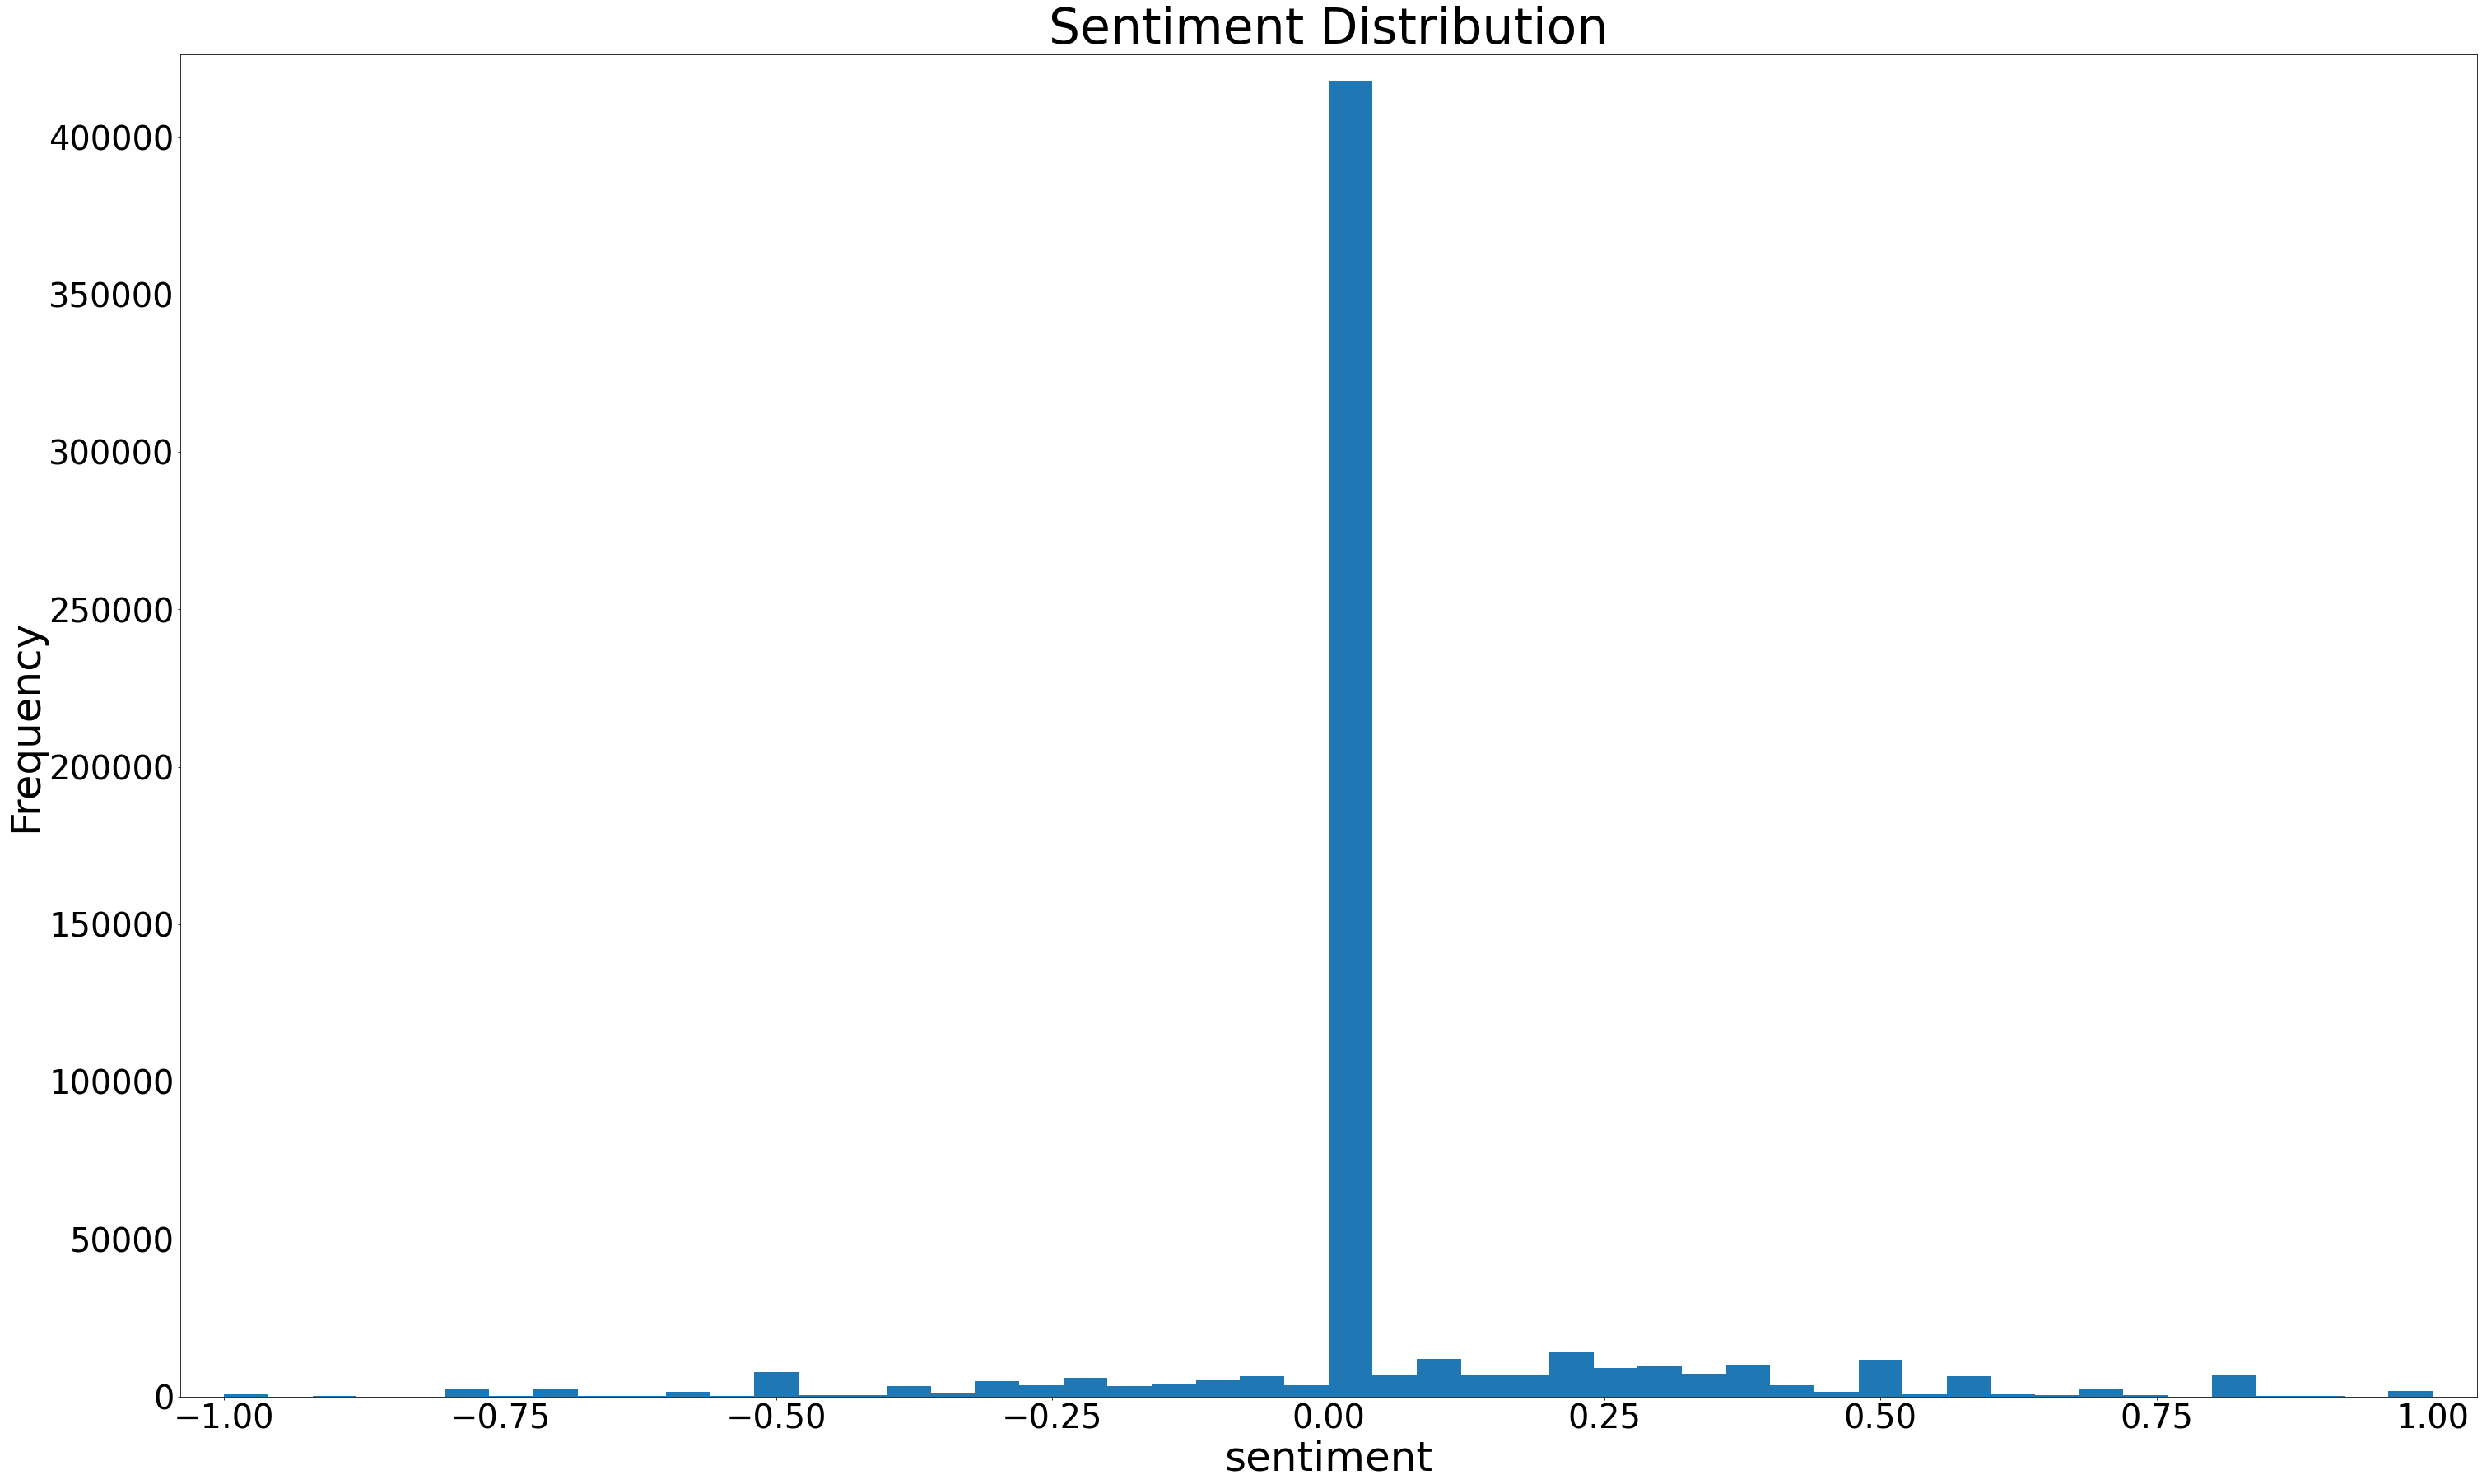

In [ ]:
#Plotting sentiment histogram
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df3['polarity_by_mesg'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [ ]:
# #Grouping data by sender
# df_grouped=df2[['from','lemmatized']].groupby(by='from').agg(lambda x:' '.join(x))
# df_grouped.head()

In [ ]:
# #Checking sentence polarity by each sender
# from textblob import TextBlob
# df_grouped['polarity_by_sender']=df_grouped['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)
# df_grouped.head()

In [ ]:
#Checking random messages with highest polarity
print("3 Random Messages with Highest Polarity:")
for index,review in enumerate(df3.loc[df3['polarity_by_mesg'].sort_values(ascending=False)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Messages with Highest Polarity:
Message 1:
 Impressive
Message 2:
 thanks! cryptodiffer da best!
Message 3:
 Awesome. Thanks.


In [ ]:
#Checking random messages with lowest polarity
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df3.loc[df3['polarity_by_mesg'].sort_values(ascending=True)[:3].index]['text']):
  print('Message {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Message 1:
 But when imbecilles like many VCs pretend to understand product/development - and preach about some stuff - then ye that's v disgusting
Message 2:
 EtherDelta had terrible UX. But had value in ROI. ROI then disappeared. A bunch of good UX things emerged. Still, no outcome.
Message 3:
 There is only two existing implementations; 

Euro Statis - Don't trust it due to it's horrible attempt at liquidity and market making (listed on HitBTC and other uncredible/shady exchanges) 

UPEUR - Only around 2 months and it seems only 8 holders on Etherscan, it is supported by UpHold and Bittrex, still not keen.


In [ ]:
# #Removing rare words
# rare_words = list(rare_words.index)
# df2['lemmatized'] = df2['lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))
# df2['lemmatized'].head()

In [ ]:
#Checking sentence polarity by each sender
from textblob import TextBlob
df_by_mnth=df3.groupby('mnth_yr')['polarity_by_mesg'].mean()
df_by_mnth.to_csv("sentiment_by_month.csv")

In [ ]:
#Checking sentence polarity by each sender
from textblob import TextBlob
df_by_quarter=df3.groupby('period')['polarity_by_mesg'].mean()
df_by_quarter.to_csv("sentiment_by_quarter.csv")

In [ ]:
#Checking sentence polarity by each sender
from textblob import TextBlob
df_by_sender=df3.groupby('from')['polarity_by_mesg'].mean()
df_by_sender.to_csv("sentiment_by_sender.csv")

Frequencies

In [ ]:
# #Term Freuqencies 
# from sklearn.feature_extraction.text import CountVectorizer 
# word_vectorizer = CountVectorizer(ngram_range=(1,1), 
#                                   analyzer='word', 
#                                   stop_words='english')
# sparse_matrix = word_vectorizer.fit_transform(df3['lemmatized_wo_emoji'])
# w_freq = sum(sparse_matrix).toarray()[0]
# w_df=pd.DataFrame(w_freq, 
#                   index=word_vectorizer.get_feature_names(), 
#                   columns=['tf']).reset_index()
# w_df.columns=['words','tf']
# w_df.sort_values('tf',ascending=False)
# w_df.to_csv("tf.csv",index=False)

In [ ]:
# #Term frequencies inverse document frequencies
# from sklearn.feature_extraction.text import TfidfVectorizer
# word_vectorizer = TfidfVectorizer(ngram_range=(1,1), 
#                                   analyzer='word', 
#                                   stop_words='english')
# sparse_matrix = word_vectorizer.fit_transform(df3['lemmatized_wo_emoji'])
# w_freq = sum(sparse_matrix).toarray()[0]
# w_df=pd.DataFrame(w_freq, 
#                   index=word_vectorizer.get_feature_names(), 
#                   columns=['tfidf']).reset_index()
# w_df.columns=['words','tfidf']            
# w_df.sort_values('tfidf',ascending=False)
# w_df.to_csv("tfidf.csv",index=False)

In [ ]:
#df3.to_csv("sentiment_telegram.csv")

In [ ]:
df4=df3[df3['compound']!=0]

In [ ]:
df4.to_csv('sentiment_telegram_non_neutral.csv',index=False)